In [1]:
from minimal_model import ref_parameters, perturbation_dynamics, \
    perturbation_steady_state, I0,  PARAMETER_NAMES, PARAMETER_DESCRIPTIONS, steady_state
import numpy as np


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


# Set font size and style in matplotlib
plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# Error bar kwargs for prism style plots
errorbar_kwargs = {'capsize': 2, 'capthick': 1, 'elinewidth': 1, 'zorder': 10}

# Spine properties
spine_properties = {'color': 'black', 'linewidth': 2}

# TODO Better colors for this figure

# Color palate with basal, default, and perturbation colors
colors_basal = ['whitesmoke','lightsteelblue', 'steelblue']

# Color palate for the K/P models
colors_AIRKO = ['grey', 'lightcoral']
colors_MIRKO = ['grey', 'steelblue']


In [3]:
# Scaling 

# ATP per O2 (3 per O)
PO2 = 5.0
# Whole body oxygen consumption rate ~ 2000 nmol/min/gBW
vO2 = 2000 * 0.7 
# ATP production rate
vATP = PO2 * vO2 
# Scale the oxygen fluxes by vE
vE = vATP 


In [4]:
KI_F = 0.2 # Assumption 
p_fited = ref_parameters( KI_F = KI_F )

In [5]:
VARIABLE_NAME = ['L', 'G', 'F', 'K', 'I', 'IA']
# Make line plots for modifying pertubing individual parameters vE, Imax and VR
time = np.linspace(0, 30, 100)

pertubation_Imax_1 = perturbation_dynamics(time,1.0, p=p_fited,  )[0]

# Version just remove insulin
time = np.linspace(30, 150, 100)
Imax0 = p_fited[PARAMETER_NAMES.index("Imax")]
pertubation_Imax_2 = perturbation_dynamics(time,1.0, p=p_fited, Imax= 0 * Imax0 )[0]

pertubation_Imax =  pd.concat([pertubation_Imax_1, pertubation_Imax_2], axis=0)


# Scale concentration by mouse reference
pertubation_Imax['G'] = pertubation_Imax['G'] * 100
pertubation_Imax['F'] = pertubation_Imax['F'] * 0.5
pertubation_Imax['K'] = pertubation_Imax['K'] * 0.5
pertubation_Imax['L'] = pertubation_Imax['L'] * 0.7

pertubation_Imax = pertubation_Imax.melt(id_vars=['time'], var_name='variable', value_name='value')


In [6]:
# Version of dose response 
# # Imax 
# perturbations = np.linspace(0.0, 1, 100)
# Imax0 = p_fited[PARAMETER_NAMES.index("Imax")]
# pertubation_Imax = pd.DataFrame([ perturbation_dynamics(time,1.0, p= p_fited, Imax=Imax0 * r )[0].iloc[-1] for r in perturbations])
# pertubation_Imax['perturbation'] = perturbations

# # Scale concentration by mouse reference
# pertubation_Imax['G'] = pertubation_Imax['G'] * 100
# pertubation_Imax['F'] = pertubation_Imax['F'] * 0.5
# pertubation_Imax['K'] = pertubation_Imax['K'] * 0.5
# pertubation_Imax['L'] = pertubation_Imax['L'] * 0.7

# pertubation_Imax = pertubation_Imax.melt(id_vars=['perturbation','time'], var_name='variable', value_name='value')

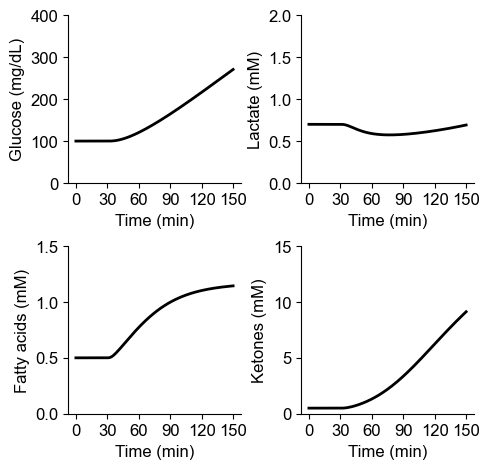

In [7]:
# Type I diabetes 
g = sns.FacetGrid(pertubation_Imax, col="variable", col_wrap=2, height=2.5, 
                  col_order=['G', 'L', 'F', 'K'], sharey=False, sharex=False, )
g.map_dataframe(sns.lineplot, x="time", y="value", linewidth=2, zorder=1, color='black', )

# Edit ylims 
g.axes[0].set_ylim(0, 400)
g.axes[1].set_ylim(0, 2.0)
g.axes[2].set_ylim(0, 1.5)
g.axes[3].set_ylim(0, 15.0)

# Edit x ticks
for a in g.axes:
    a.set_xticks([0,30,60,90,120,150])

# Change y and x labels
g.axes[0].set_ylabel("Glucose (mg/dL)")
g.axes[1].set_ylabel("Lactate (mM)")
g.axes[2].set_ylabel("Fatty acids (mM)")
g.axes[3].set_ylabel("Ketones (mM)")
g.axes[0].set_xlabel("Time (min)")
g.axes[1].set_xlabel("Time (min)")
g.axes[2].set_xlabel("Time (min)")
g.axes[3].set_xlabel("Time (min)")

g.set_titles("", )


sns.despine()
plt.savefig("output/valdiation_type_1_diabetes_insulin_drop_out.svg", bbox_inches='tight')

In [8]:
# Glucose tolerance test - Wildtype 
time = np.linspace(0, 20, 100)
pertubation_G_1 = perturbation_dynamics(time,1.0, p=p_fited, v_in_G = 0.06 )[0]
time = np.linspace(20, 120, 100)
x0 = pertubation_G_1.iloc[-1][VARIABLE_NAME].values
pertubation_G_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, v_in_G = 0.0)[0]

pertubation_G_wt = pd.concat([pertubation_G_1, pertubation_G_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_G_wt['G'] = pertubation_G_wt['G'] * 100
pertubation_G_wt['F'] = pertubation_G_wt['F'] * 0.5
pertubation_G_wt['K'] = pertubation_G_wt['K'] * 0.5
pertubation_G_wt['L'] = pertubation_G_wt['L'] * 0.7
pertubation_G_wt['I'] = pertubation_G_wt['I'] / I0 * 0.4


In [9]:
# Glucose tolerance test - Adipose insulin receptor K/O 
p_ADIRKO = p_fited.copy()
p_ADIRKO[PARAMETER_NAMES.index('with_LI')] = False
X0 = steady_state(1,p_ADIRKO)

ADIRKO_X0 = X0.copy()

time = np.linspace(0, 20, 100)
pertubation_G_1 = perturbation_dynamics(time,1.0, p=p_ADIRKO, X0 = ADIRKO_X0, v_in_G = 0.06 )[0]
time = np.linspace(20, 120, 100)
x0 = pertubation_G_1.iloc[-1][VARIABLE_NAME].values
pertubation_G_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_ADIRKO, v_in_G = 0.0)[0]

pertubation_G_AIRKO = pd.concat([pertubation_G_1, pertubation_G_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_G_AIRKO['G'] = pertubation_G_AIRKO['G'] * 100
pertubation_G_AIRKO['F'] = pertubation_G_AIRKO['F'] * 0.5
pertubation_G_AIRKO['K'] = pertubation_G_AIRKO['K'] * 0.5
pertubation_G_AIRKO['L'] = pertubation_G_AIRKO['L'] * 0.7
pertubation_G_AIRKO['I'] = pertubation_G_AIRKO['I'] / I0 * 0.4



In [10]:
# Glucose tolerance test - Wildtype (MIRKO control) 
time = np.linspace(0, 20, 100)
pertubation_G_1 = perturbation_dynamics(time,1.0, p=p_fited, v_in_G = 0.03 )[0]
time = np.linspace(20, 120, 100)
x0 = pertubation_G_1.iloc[-1][VARIABLE_NAME].values
pertubation_G_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, v_in_G = 0.0)[0]

pertubation_G_wt1 = pd.concat([pertubation_G_1, pertubation_G_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_G_wt1['G'] = pertubation_G_wt1['G'] * 100
pertubation_G_wt1['F'] = pertubation_G_wt1['F'] * 0.5
pertubation_G_wt1['K'] = pertubation_G_wt1['K'] * 0.5
pertubation_G_wt1['L'] = pertubation_G_wt1['L'] * 0.7
pertubation_G_wt1['I'] = pertubation_G_wt1['I'] / I0 * 0.4


In [11]:
# Glucose tolerance test -  Muscle insulin receptor K/O
p_MIRKO = p_fited.copy()
p_MIRKO[PARAMETER_NAMES.index('with_SI')] = False
X0 = steady_state(1,p_MIRKO)

MIRKO_X0 = X0.copy()

time = np.linspace(0, 20, 100)
pertubation_G_1 = perturbation_dynamics(time,1.0, p=p_MIRKO, v_in_G = 0.03 )[0]
time = np.linspace(20, 120, 100)
x0 = pertubation_G_1.iloc[-1][VARIABLE_NAME].values
pertubation_G_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_MIRKO, v_in_G = 0.0)[0]

pertubation_G_MIRKO = pd.concat([pertubation_G_1, pertubation_G_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_G_MIRKO['G'] = pertubation_G_MIRKO['G'] * 100
pertubation_G_MIRKO['F'] = pertubation_G_MIRKO['F'] * 0.5
pertubation_G_MIRKO['K'] = pertubation_G_MIRKO['K'] * 0.5
pertubation_G_MIRKO['L'] = pertubation_G_MIRKO['L'] * 0.7
pertubation_G_MIRKO['I'] = pertubation_G_MIRKO['I'] / I0 * 0.4



In [12]:
# Insulin tolerance test -  Wildtype 
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, p=p_fited,)[0]

time = np.linspace(1, 60, 100)
x0=[1.0,1.0,1.0,1.0, I0 * 75, I0 ]
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, )[0]

pertubation_I = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I['G'] = pertubation_I['G'] * 100
pertubation_I['F'] = pertubation_I['F'] * 0.5
pertubation_I['K'] = pertubation_I['K'] * 0.5
pertubation_I['L'] = pertubation_I['L'] * 0.7
pertubation_I['I'] = pertubation_I['I'] / I0 * 0.4



In [13]:
# Insulin tolerance test -  Wildtype 
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, p=p_fited,)[0]

time = np.linspace(1, 60, 100)
x0=steady_state(1,p_fited)
x0[-2] = I0 * 20
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, )[0]

pertubation_I = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I['G'] = pertubation_I['G'] * 100
pertubation_I['F'] = pertubation_I['F'] * 0.5
pertubation_I['K'] = pertubation_I['K'] * 0.5
pertubation_I['L'] = pertubation_I['L'] * 0.7
pertubation_I['I'] = pertubation_I['I'] / I0 * 0.4



In [14]:
# Insulin tolerance test -  WT
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, p=p_fited,)[0]

time = np.linspace(1, 100, 100)
x0=steady_state(1,p_fited)
x0[-2] = I0 * 80
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, )[0]

pertubation_I_wt = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I_wt['G'] = pertubation_I_wt['G'] * 100
pertubation_I_wt['F'] = pertubation_I_wt['F'] * 0.5
pertubation_I_wt['K'] = pertubation_I_wt['K'] * 0.5
pertubation_I_wt['L'] = pertubation_I_wt['L'] * 0.7
pertubation_I_wt['I'] = pertubation_I_wt['I'] / I0 * 0.4



In [15]:
# Insulin tolerance test -  Adipose insulin receptor KO 
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, X0=ADIRKO_X0, p=p_ADIRKO,)[0]

time = np.linspace(1, 100, 100)
x0=steady_state(1, p_ADIRKO)
x0[-2] = I0 * 80
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_ADIRKO, )[0]

pertubation_I_ADIRKO = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I_ADIRKO['G'] = pertubation_I_ADIRKO['G'] * 100
pertubation_I_ADIRKO['F'] = pertubation_I_ADIRKO['F'] * 0.5
pertubation_I_ADIRKO['K'] = pertubation_I_ADIRKO['K'] * 0.5
pertubation_I_ADIRKO['L'] = pertubation_I_ADIRKO['L'] * 0.7
pertubation_I_ADIRKO['I'] = pertubation_I_ADIRKO['I'] / I0 * 0.4


In [16]:
# Insulin tolerance test -  WT
time = np.linspace(0, 10, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, p=p_fited,)[0]

time = np.linspace(10, 100, 100)
x0=steady_state(1,p_fited)
x0[-2] = I0 * 60
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, )[0]

pertubation_I_wt2 = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I_wt2['G'] = pertubation_I_wt2['G'] * 100
pertubation_I_wt2['F'] = pertubation_I_wt2['F'] * 0.5
pertubation_I_wt2['K'] = pertubation_I_wt2['K'] * 0.5
pertubation_I_wt2['L'] = pertubation_I_wt2['L'] * 0.7
pertubation_I_wt2['I'] = pertubation_I_wt2['I'] / I0 * 0.4


In [17]:
# Insulin tolerance test -  Muscle insulin receptor KO 
time = np.linspace(0, 10, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, X0=MIRKO_X0, p=p_MIRKO,)[0]

time = np.linspace(10, 100, 100)
x0=steady_state(1,p_MIRKO)
x0[-2] = I0 * 60
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_MIRKO, )[0]

pertubation_I_MIRKO = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I_MIRKO['G'] = pertubation_I_MIRKO['G'] * 100
pertubation_I_MIRKO['F'] = pertubation_I_MIRKO['F'] * 0.5
pertubation_I_MIRKO['K'] = pertubation_I_MIRKO['K'] * 0.5
pertubation_I_MIRKO['L'] = pertubation_I_MIRKO['L'] * 0.7
pertubation_I_MIRKO['I'] = pertubation_I_MIRKO['I'] / I0 * 0.4



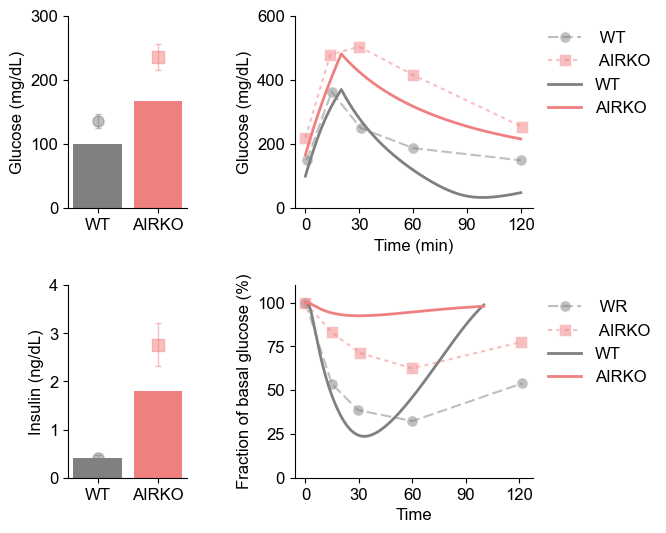

In [18]:
# Figure pannel for Adipose insulin receptor knockout
f, ax = plt.subplots(2,2, figsize=(6,6), gridspec_kw={'width_ratios': [2.5, 5]})
plt.subplots_adjust(hspace=0.4, wspace=0.6)

# Barplot of Glucose in WT and 
# Data from 2017 Rob. Kahn Cell Metabolism paperd
Glucose= [ 136.29629629629562, 235.50264550264487]
Glucose_SEM = [147.31922398588995 - 136.29629629629562, 256.170634920634 -  235.50264550264487]


ax[0,0].bar(['WT', 'AIRKO'], [pertubation_G_wt.loc[0,'G'], pertubation_G_AIRKO.loc[0,'G']], 
            color=colors_AIRKO)
ax[0,0].errorbar(['WT',], Glucose[0], yerr= Glucose_SEM[0], 
                 linestyle='none', **errorbar_kwargs, color=colors_AIRKO[0], marker='o', markersize=8, alpha=0.5)
ax[0,0].errorbar(['AIRKO',], Glucose[1], yerr= Glucose_SEM[1], 
                 linestyle='none', **errorbar_kwargs, color=colors_AIRKO[1], marker='s', markersize=8, alpha=0.5)

ax[0,0].set_ylim(0,300)
ax[0,0].set_ylabel('Glucose (mg/dL)')

# Time plot - for GTT 

GTT_data = pd.read_csv('./data/GTT_AIRKO_2017.csv')

sns.lineplot(GTT_data, x='Time', y='Glucose', hue='Genotype', style='Genotype',
            ax =ax[0,1], palette=colors_AIRKO, marker='o', markersize=8, 
            dashes=[(5,2),(2,2)], markers=['o','s'], alpha=0.5
            )

ax[0,1].plot( pertubation_G_wt['time'],pertubation_G_wt['G'], color=colors_AIRKO[0], label='WT', linewidth=2)
ax[0,1].plot( pertubation_G_AIRKO['time'],pertubation_G_AIRKO['G'], color=colors_AIRKO[1], label='AIRKO', linewidth=2)


ax[0,1].set_ylim(0,600)
ax[0,1].set_xticks([0,30,60,90,120])
ax[0,1].set_ylabel('Glucose (mg/dL)')
ax[0,1].set_xlabel('Time (min)')

ax[0,1].legend( frameon=False, loc='upper left', bbox_to_anchor=(1, 1))


# Barplot for insulin 

# Data
Insulin = [ 0.40533333333333205, 2.7626666666666684]
Insulin_SEM = [0.46933333333333416 - 0.40533333333333205, 3.2106666666666674 -  2.7626666666666684]

ax[1,0].bar(['WT', 'AIRKO'], [pertubation_G_wt.loc[0,'I'], pertubation_G_AIRKO.loc[0,'I']], color=colors_AIRKO)
ax[1,0].errorbar(['WT',], Insulin[0], yerr= Insulin_SEM[0], 
                 linestyle='none', **errorbar_kwargs, color=colors_AIRKO[0], marker='o', markersize=8,alpha=0.5)
ax[1,0].errorbar(['AIRKO',], Insulin[1], yerr= Insulin_SEM[1], 
                 linestyle='none', **errorbar_kwargs, color=colors_AIRKO[1], marker='s', markersize=8,alpha=0.5)

ax[1,0].set_ylim(0,4)
ax[1,0].set_ylabel('Insulin (ng/dL)')


# Time plot for ITT
ITT_data = pd.read_csv('./data/ITT_AIRKO_2017.csv')
ITT_data['Glucose_fraction'] = 100 - ITT_data['Glucose']

sns.lineplot(ITT_data, x='Time', y='Glucose_fraction', hue='Genotype', style='Genotype',
            ax =ax[1,1], palette=colors_AIRKO, marker='o', markersize=8, 
            dashes=[(5,2),(2,2)], markers=['o','s'], alpha=0.5
            )

ax[1,1].plot( pertubation_I_wt['time'],pertubation_I_wt['G']/pertubation_G_wt.loc[0,'G'] * 100, 
             color=colors_AIRKO[0], label='WT', linewidth=2)
ax[1,1].plot( pertubation_I_ADIRKO['time'],pertubation_I_ADIRKO['G']/pertubation_G_AIRKO.loc[0,'G'] * 100, 
             color=colors_AIRKO[1], label='AIRKO', linewidth=2)
ax[1,1].set_ylim(0,110)
ax[1,1].set_xticks([0,30,60,90,120])
ax[1,1].set_ylabel('Fraction of basal glucose (%)')

ax[1,1].legend( frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

sns.despine()

plt.savefig('output/validation_AIRKO_G_I_GTT_ITT.svg',  bbox_inches='tight')

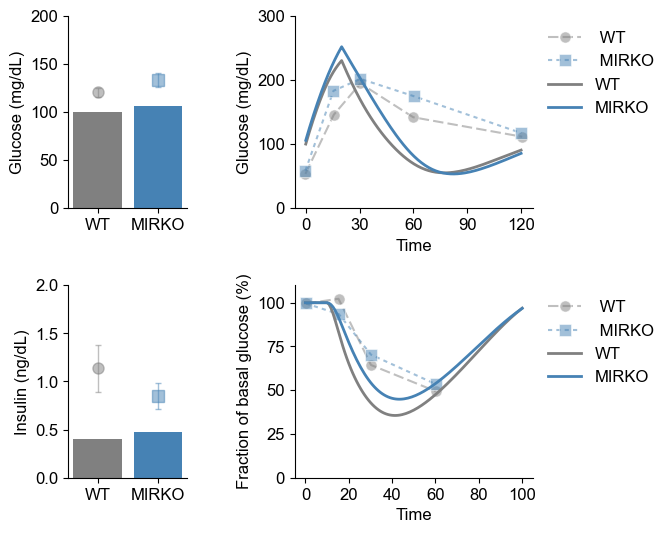

In [19]:
# Figure pannel for M insulin receptor knockout
f, ax = plt.subplots(2,2, figsize=(6,6), gridspec_kw={'width_ratios': [2.5, 5]})
plt.subplots_adjust(hspace=0.4, wspace=0.6)

# Barplot of Glucose in WT 
Glucose= [ 120.49382716049381, 133.66255144032922]
Glucose_SEM = [125.10288065843622 - 120.49382716049381, 140.90534979423867 -  133.66255144032922]


ax[0,0].bar(['WT', 'MIRKO'], [pertubation_G_wt1.loc[0,'G'], pertubation_G_MIRKO.loc[0,'G']], 
            color=colors_MIRKO)
ax[0,0].errorbar(['WT',], Glucose[0], yerr= Glucose_SEM[0], 
                 linestyle='none', **errorbar_kwargs, color=colors_MIRKO[0], marker='o', markersize=8, alpha=0.5)
ax[0,0].errorbar(['MIRKO',], Glucose[1], yerr= Glucose_SEM[1], 
                 linestyle='none', **errorbar_kwargs, color=colors_MIRKO[1], marker='s', markersize=8, alpha=0.5)
ax[0,0].set_ylim(0,200)
ax[0,0].set_ylabel('Glucose (mg/dL)')

# Time plot - for GTT 
GTT_data = pd.read_csv('./data/GTT_MIRKO.csv')

sns.lineplot(GTT_data, x='Time', y='Glucose', hue='Genotype', style='Genotype',
            ax =ax[0,1], palette=colors_MIRKO, marker='o', markersize=8, 
            dashes=[(5,2),(2,2)], markers=['o','s'], alpha=0.5
            )

ax[0,1].plot( pertubation_G_wt1['time'],pertubation_G_wt1['G'], 
             color=colors_MIRKO[0], label='WT', linewidth=2)
ax[0,1].plot( pertubation_G_MIRKO['time'],pertubation_G_MIRKO['G'],
              color=colors_MIRKO[1], label='MIRKO', linewidth=2)
ax[0,1].set_ylim(0,300)
ax[0,1].set_xticks([0,30,60,90,120])
ax[0,1].set_ylabel('Glucose (mg/dL)')
ax[0,1].legend( frameon=False, loc='upper left', bbox_to_anchor=(1, 1))


# Barplot for insulin 
Insulin = [ 1.1358024691358022, 0.8518518518518516]
Insulin_SEM = [1.382716049382716 - 1.1358024691358022, 0.987654320987654 - 0.8518518518518516]

ax[1,0].bar(['WT', 'MIRKO'], [pertubation_G_wt1.loc[0,'I'], pertubation_G_MIRKO.loc[0,'I']], 
            color=colors_MIRKO)
ax[1,0].errorbar(['WT',], Insulin[0], yerr= Insulin_SEM[0], 
                 linestyle='none', **errorbar_kwargs, color=colors_MIRKO[0], 
                 marker='o', markersize=8,alpha=0.5)
ax[1,0].errorbar(['MIRKO',], Insulin[1], yerr= Insulin_SEM[1], 
                 linestyle='none', **errorbar_kwargs, color=colors_MIRKO[1], 
                 marker='s', markersize=8,alpha=0.5)

ax[1,0].set_ylim(0,2)
ax[1,0].set_ylabel('Insulin (ng/dL)')


# Time plot for ITT
ITT_data = pd.read_csv('./data/ITT_MIRKO.csv')
ITT_data['Glucose_fraction'] = ITT_data['Glucose']

sns.lineplot(ITT_data, x='Time', y='Glucose_fraction', hue='Genotype', style='Genotype',
            ax =ax[1,1], palette=colors_MIRKO, marker='o', markersize=8, 
            dashes=[(5,2),(2,2)], markers=['o','s'], alpha=0.5)

ax[1,1].plot( pertubation_I_wt2['time'],pertubation_I_wt2['G']/pertubation_I_wt2.loc[0,'G'] * 100,
              color=colors_MIRKO[0], label='WT', linewidth=2)
ax[1,1].plot( pertubation_I_MIRKO['time'],pertubation_I_MIRKO['G']/pertubation_I_MIRKO.loc[0,'G'] * 100, 
              color=colors_MIRKO[1], label='MIRKO', linewidth=2)
ax[1,1].set_ylim(0,110)
ax[1,1].set_xticks([0,20,40,60,80,100])
ax[1,1].set_ylabel('Fraction of basal glucose (%)')
ax[1,1].legend( frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

sns.despine()

plt.savefig('output/validation_MIRKO_G_I_GTT_ITT.svg',  bbox_inches='tight')